In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import csv

In [2]:
from matplotlib import rcParams
rcParams['font.family'] = 'Serif'

## Product parameter

In [3]:
dx = [-2, 2] #mm

dy = [-2, 2] #mm

dz = [4, 16] # mm

## Printing parameter

In [4]:
h = 0.3 # layer thickness, mm

d = 0.42 # hatch spacing, mm

v_infill = 6.35 # infill scanning speed, mm/s

v_outline = 10.58

## Produce parallel scanning path

### 1. outline

In [5]:
def get_outline_path_A(dt, dx, dy, height, v_outline, x_full, y_full, z_full, t_full):
    Lx = dx[1] - dx[0]
    Ly = dy[1] - dy[0]
    # assume A -> B-> C-> D as
    # C --- B
    # |     |
    # D --- A
    x_full.extend([dx[1], dx[1], dx[0], dx[0], dx[1]])
    y_full.extend([dy[0], dy[1], dy[1], dy[0], dy[0]])
    z_full.extend([height, height, height, height, height])
    
    t_full.append(dt)
    t_full.append(Ly/v_outline)
    t_full.append(Lx/v_outline)
    t_full.append(Ly/v_outline)
    t_full.append(Lx/v_outline)

In [6]:
def get_outline_path_B(dt, dx, dy, height, v_outline, x_full, y_full, z_full, t_full):
    Lx = dx[1] - dx[0]
    Ly = dy[1] - dy[0]
    # assume A -> B-> C-> D as
    # C --- B
    # |     |
    # D --- A
    x_full.extend([dx[1], dx[0], dx[0], dx[1], dx[1]])
    y_full.extend([dy[1], dy[1], dy[0], dy[0], dy[1]])
    z_full.extend([height, height, height, height, height])
    
    t_full.append(dt)
    t_full.append(Lx/v_outline)
    t_full.append(Ly/v_outline)
    t_full.append(Lx/v_outline)
    t_full.append(Ly/v_outline)

In [7]:
def get_outline_path_C(dt, dx, dy, height, v_outline, x_full, y_full, z_full, t_full):
    Lx = dx[1] - dx[0]
    Ly = dy[1] - dy[0]
    # assume A -> B-> C-> D as
    # C --- B
    # |     |
    # D --- A
    x_full.extend([ dx[0], dx[0], dx[1], dx[1], dx[0]])
    y_full.extend([ dy[1], dy[0], dy[0], dy[1], dy[1]])
    z_full.extend([height, height, height, height, height])
    
    t_full.append(dt)
    t_full.append(Ly/v_outline)
    t_full.append(Lx/v_outline)
    t_full.append(Ly/v_outline)
    t_full.append(Lx/v_outline)

In [8]:
def get_outline_path_D(dt, dx, dy, height, v_outline, x_full, y_full, z_full, t_full):
    Lx = dx[1] - dx[0]
    Ly = dy[1] - dy[0]
    # assume A -> B-> C-> D as
    # C --- B
    # |     |
    # D --- A
    x_full.extend([  dx[0], dx[1], dx[1], dx[0], dx[0]])
    y_full.extend([  dy[0], dy[0], dy[1], dy[1], dy[0]])
    z_full.extend([height, height, height, height, height])
    
    t_full.append(dt)
    t_full.append(Lx/v_outline)
    t_full.append(Ly/v_outline)
    t_full.append(Lx/v_outline)
    t_full.append(Ly/v_outline)

### 2. filling path

In [9]:
def get_horizontal_filling_path(dt, y_start, y_end, move_right,  dx, dy, hatch_spacing, height, v_infill, v_outline, x_full, y_full, z_full, t_full):
    Lx = dx[1] - dx[0]
    Ly = dy[1] - dy[0]
    t_vert = hatch_spacing/v_outline
    t_hor = Lx/v_infill
    t_full.append(dt)
    if move_right == False:
        hatch_spacing = - hatch_spacing
    for y in np.arange(y_start, y_end, hatch_spacing):
        y_full.extend([y,y])
        if move_right == True:
            x_full.extend(dx)
            move_right=False
        else:
            x_full.extend([dx[1], dx[0]])
            move_right=True
        z_full.extend([height, height])
        t_full.extend([t_hor, t_vert])
    del t_full[-1]

In [10]:
def get_vertical_filling_path(dt, x_start, x_end, move_up, dx, dy, hatch_spacing, height, v_infill, v_outline, x_full, y_full, z_full, t_full):
    Lx = dx[1] - dx[0]
    Ly = dy[1] - dy[0]
    t_hor = hatch_spacing/v_outline
    t_vert = Ly/v_infill
    t_full.append(dt)
    if move_up == False:
        hatch_spacing = -hatch_spacing
    for x in np.arange(x_start, x_end, hatch_spacing):
        x_full.extend([x,x])
        if move_up == True:
            y_full.extend(dy)
            move_up=False
        else:
            y_full.extend([dy[1], dy[0]])
            move_up=True
        z_full.extend([height, height])
        t_full.extend([t_vert, t_hor])
    del t_full[-1]

In [11]:
x_full = []
y_full = []
z_full = []
t_full = []

x_start = -1.9
x_end = 2.0
y_start = -1.9
y_end = 2.0
hatch_spacing = 0.42

height = 0.0

total_height = 16

dt = 0.01;

# get_outline_path_D(dx, dy, 0.0, v_outline,  x_full, y_full, z_full, t_full)



# get_outline_path_B(dx, dy, 0.3, v_outline, dt,  x_full, y_full, z_full, t_full)

# print(x_full)
# print(y_full)
# print(z_full)
# print(t_full)

### get one-layer printing path

In [12]:
x_full = []
y_full = []
z_full = []
t_full = []

# get_outline_path_D(dt, dx, dy, height, v_outline,  x_full, y_full, z_full, t_full)
get_vertical_filling_path(dt, x_start, x_end, True, dx, dy, hatch_spacing, height, v_infill, v_outline, x_full, y_full, z_full, t_full)
# dt = 0.1;
# get_outline_path_B(dt, dx, dy, height+0.3, v_outline,  x_full, y_full, z_full, t_full)
# get_horizontal_filling_path(2.0, -1.8, False, dx, dy, hatch_spacing, height+0.3, v_infill, x_full, y_full, z_full, t_full)

print(x_full)
print(y_full)
print(z_full)
print(t_full)

[-1.9, -1.9, -1.48, -1.48, -1.06, -1.06, -0.6400000000000001, -0.6400000000000001, -0.2200000000000002, -0.2200000000000002, 0.19999999999999973, 0.19999999999999973, 0.6199999999999997, 0.6199999999999997, 1.0399999999999996, 1.0399999999999996, 1.4599999999999995, 1.4599999999999995, 1.8799999999999994, 1.8799999999999994]
[-2, 2, 2, -2, -2, 2, 2, -2, -2, 2, 2, -2, -2, 2, 2, -2, -2, 2, 2, -2]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.01, 0.6299212598425197, 0.03969754253308128, 0.6299212598425197, 0.03969754253308128, 0.6299212598425197, 0.03969754253308128, 0.6299212598425197, 0.03969754253308128, 0.6299212598425197, 0.03969754253308128, 0.6299212598425197, 0.03969754253308128, 0.6299212598425197, 0.03969754253308128, 0.6299212598425197, 0.03969754253308128, 0.6299212598425197, 0.03969754253308128, 0.6299212598425197]


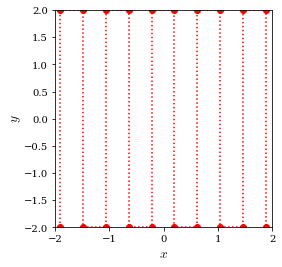

In [13]:
# %matplotlib qt
%matplotlib inline
fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.plot(x,y,z, '-or')
plt.plot(x_full,y_full, ':or')
# plt.axis('equal')
plt.axis([-2, 2, -2, 2])
# plt.xticks([-10, -5, 0, 5, 10])
# plt.yticks([-10, -5, 0, 5, 10])
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel("$x$", usetex=True, fontsize = 14)
plt.ylabel("$y$", usetex=True,fontsize = 14)


# fig.savefig('printing_path_2D.pdf', bbox_inches='tight')

# show the plot
plt.show()

In [14]:
x_full = []
y_full = []
z_full = []
t_full = []

get_horizontal_filling_path(dt, -y_start, -y_end, False, dx, dy, hatch_spacing, 0.0, v_infill, v_outline, x_full, y_full, z_full, t_full)

print(x_full)
print(y_full)
print(z_full)
print(t_full)

[2, -2, -2, 2, 2, -2, -2, 2, 2, -2, -2, 2, 2, -2, -2, 2, 2, -2, -2, 2]
[1.9, 1.9, 1.48, 1.48, 1.06, 1.06, 0.6400000000000001, 0.6400000000000001, 0.2200000000000002, 0.2200000000000002, -0.19999999999999973, -0.19999999999999973, -0.6199999999999997, -0.6199999999999997, -1.0399999999999996, -1.0399999999999996, -1.4599999999999995, -1.4599999999999995, -1.8799999999999994, -1.8799999999999994]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.1, 0.6299212598425197, 0.03969754253308128, 0.6299212598425197, 0.03969754253308128, 0.6299212598425197, 0.03969754253308128, 0.6299212598425197, 0.03969754253308128, 0.6299212598425197, 0.03969754253308128, 0.6299212598425197, 0.03969754253308128, 0.6299212598425197, 0.03969754253308128, 0.6299212598425197, 0.03969754253308128, 0.6299212598425197, 0.03969754253308128, 0.6299212598425197]


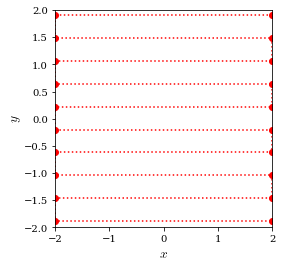

In [15]:
# %matplotlib qt
%matplotlib inline
fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.plot(x,y,z, '-or')
plt.plot(x_full,y_full, ':or')
# plt.axis('equal')
plt.axis([-2, 2, -2, 2])
# plt.xticks([-10, -5, 0, 5, 10])
# plt.yticks([-10, -5, 0, 5, 10])
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel("$x$", usetex=True, fontsize = 14)
plt.ylabel("$y$", usetex=True,fontsize = 14)


# fig.savefig('printing_path_2D.pdf', bbox_inches='tight')

# show the plot
plt.show()

### get multi-layer printing path

In [16]:
x_full = []
y_full = []
z_full = []
t_full = []

dz = 0.3
height_substrate = 4


vertical_fill = True
for z in np.arange(height_substrate, total_height, dz):
    print(z)
    if vertical_fill == True:
#         get_outline_path_D(dt, dx, dy, z, v_outline,  x_full, y_full, z_full, t_full)
        get_vertical_filling_path(dt, x_start, x_end, True, dx, dy, hatch_spacing, z, v_infill, v_outline, x_full, y_full, z_full, t_full)
        vertical_fill = False
    else:
#         get_outline_path_B(dt, dx, dy, z, v_outline,  x_full, y_full, z_full, t_full)
        get_horizontal_filling_path(dt, -y_start, -y_end, False, dx, dy, hatch_spacing, z, v_infill, v_outline, x_full, y_full, z_full, t_full)
        vertical_fill = True


# print(x_full)
# print(y_full)
# print(z_full)
# print(t_full)

4.0
4.3
4.6
4.8999999999999995
5.199999999999999
5.499999999999999
5.799999999999999
6.099999999999999
6.399999999999999
6.699999999999998
6.999999999999998
7.299999999999998
7.599999999999998
7.899999999999998
8.199999999999998
8.499999999999996
8.799999999999997
9.099999999999998
9.399999999999997
9.699999999999996
9.999999999999996
10.299999999999997
10.599999999999996
10.899999999999995
11.199999999999996
11.499999999999996
11.799999999999995


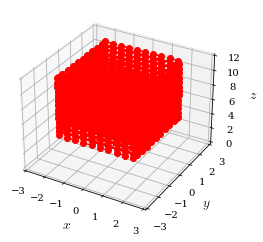

In [17]:
# %matplotlib qt
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_full,y_full,z_full, '-or')
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([0, total_height])
# ax.set_xticks([-10, -5, 0, 5, 10])
# ax.set_yticks([-10, -5, 0, 5, 10])
# ax.set_zticks([5, 7, 9, 11, 13, 15, 17, 19, 21, 23])
ax.set_xlabel("$x$", usetex=True, fontsize = 14)
ax.set_ylabel("$y$", usetex=True,fontsize = 14)
ax.set_zlabel("$z$", usetex=True,fontsize = 14)

# fig.tight_layout()
# fig.savefig('box_printing_path_3layers.pdf', bbox_inches='tight')

# show the plot
plt.show()

### Get accumulated time

In [18]:
t_full[0] = 0
t_accum = np.cumsum(t_full,axis=0)
print(t_accum)

[  0.           0.62992126   0.6696188    1.29954006   1.3392376
   1.96915886   2.00885641   2.63877767   2.67847521   3.30839647
   3.34809401   3.97801527   4.01771281   4.64763407   4.68733162
   5.31725288   5.35695042   5.98687168   6.02656922   6.65649048
   6.67649048   7.30641174   7.34610928   7.97603054   8.01572809
   8.64564935   8.68534689   9.31526815   9.35496569   9.98488695
  10.02458449  10.65450575  10.6942033   11.32412456  11.3638221
  11.99374336  12.0334409   12.66336216  12.7030597   13.33298096
  13.35298096  13.98290222  14.02259976  14.65252102  14.69221857
  15.32213983  15.36183737  15.99175863  16.03145617  16.66137743
  16.70107497  17.33099623  17.37069378  18.00061504  18.04031258
  18.67023384  18.70993138  19.33985264  19.37955018  20.00947144
  20.02947144  20.6593927   20.69909025  21.32901151  21.36870905
  21.99863031  22.03832785  22.66824911  22.70794665  23.33786791
  23.37756546  24.00748672  24.04718426  24.67710552  24.71680306
  25.3467243

In [19]:
xt_data=np.vstack((t_accum, x_full)).T
xt_df=pd.DataFrame(xt_data)

yt_data=np.vstack((t_accum, y_full)).T
yt_df=pd.DataFrame(yt_data)

zt_data=np.vstack((t_accum, z_full)).T
zt_df=pd.DataFrame(zt_data)

In [20]:
xt_df.to_csv('path_x.csv', index=False, header=False)
yt_df.to_csv('path_y.csv', index=False, header=False)
zt_df.to_csv('path_z.csv', index=False, header=False)